# Loan Prediction
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Hypothesis Generation

Most Important factors that would affect the Loan approval:
1. Salary: Applicants with high income should have higher chances of approval.
2. Previous History: Applicants with good history should have higher chances of approval
3. Loan Amount: If the amount is low, it should be approved.
4. Loan Term: lesser time the better
5. EMI: Lower the EMI to be paid, the better
6. Incomes: The applicant with high income should get the loan.
7. Co-App income: If there is a coapplicant with income, the loan should be approved.

In [2]:
# Import the training set.
train = pd.read_csv("train_set.csv")
loan = train.copy()

#Here the train is the original training set. I will be using loan as the dataset to make any changes and for EDA.

In [3]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
print(loan.shape[0]) # How many total rows in the dataset.
loan.count()

614


Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

Here we can see that we have 614 records in total. But there are columns that have less that 614 records incidicating Null values there.

In [5]:
# Columns with Null values are:
loan.count()[loan.count() < loan.shape[0]]

Gender              601
Married             611
Dependents          599
Self_Employed       582
LoanAmount          592
Loan_Amount_Term    600
Credit_History      564
dtype: int64

In [6]:
loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Object Type -> Categorical

int64 -> Integer Type (Continuous)

float64  -> Continuous Variable

## Univariate Analysis

In [7]:
# Target Variable - Loan Approval.
loan['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

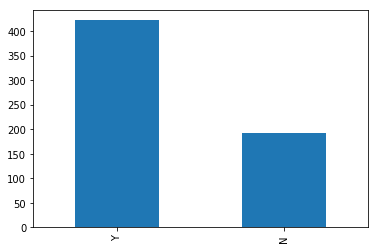

In [8]:
loan['Loan_Status'].value_counts().plot.bar()

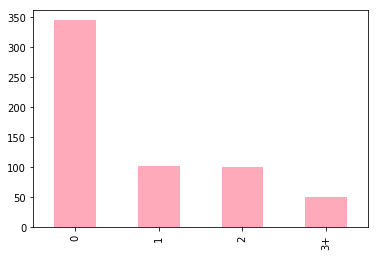

In [9]:
# Plotting Bar Graph for Dependents:
loan['Dependents'].value_counts().plot.bar(color='#FFAABB')
# This was just to show Hex RGB color.

Now are going to do multiple plots for Categorical Features.

Columns with Categorical Values are: Gender, Married, Self_Employed, Credit_History, Loan_Status

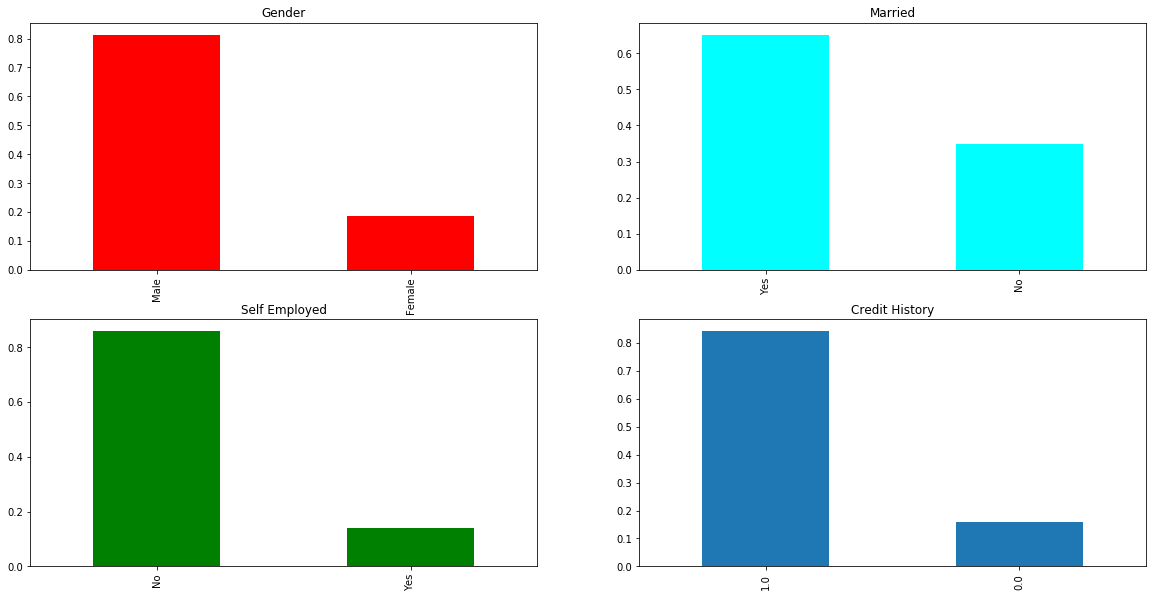

In [10]:
# Plotting the Categorical Variables.
plt.figure(1)

plt.subplot(221)
loan['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Gender', color = 'red')

plt.subplot(222)
loan['Married'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Married', color='cyan')

plt.subplot(223)
loan['Self_Employed'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Self Employed', color = 'green')

plt.subplot(224)
loan['Credit_History'].value_counts(normalize=True).plot.bar(figsize = (20,10), title = 'Credit History');


As we have normalized the graphs, it is easy to visualize the percentage.

## Conclusions:

1. Around 80% applicants are males.
2. A little more than 60% of applicants are married.
3. Around 85% applicant are not Self Employed
4. About 80% of applicants have repaid their loan.

### It can be concluded that an average applicant is a married male with Employment who have repaid their previous loans.

## Now to plot the Ordinal columns:
The ordinal columns are 
1. Number of Dependents
2. Education Level
3. Property Area of their purchase.

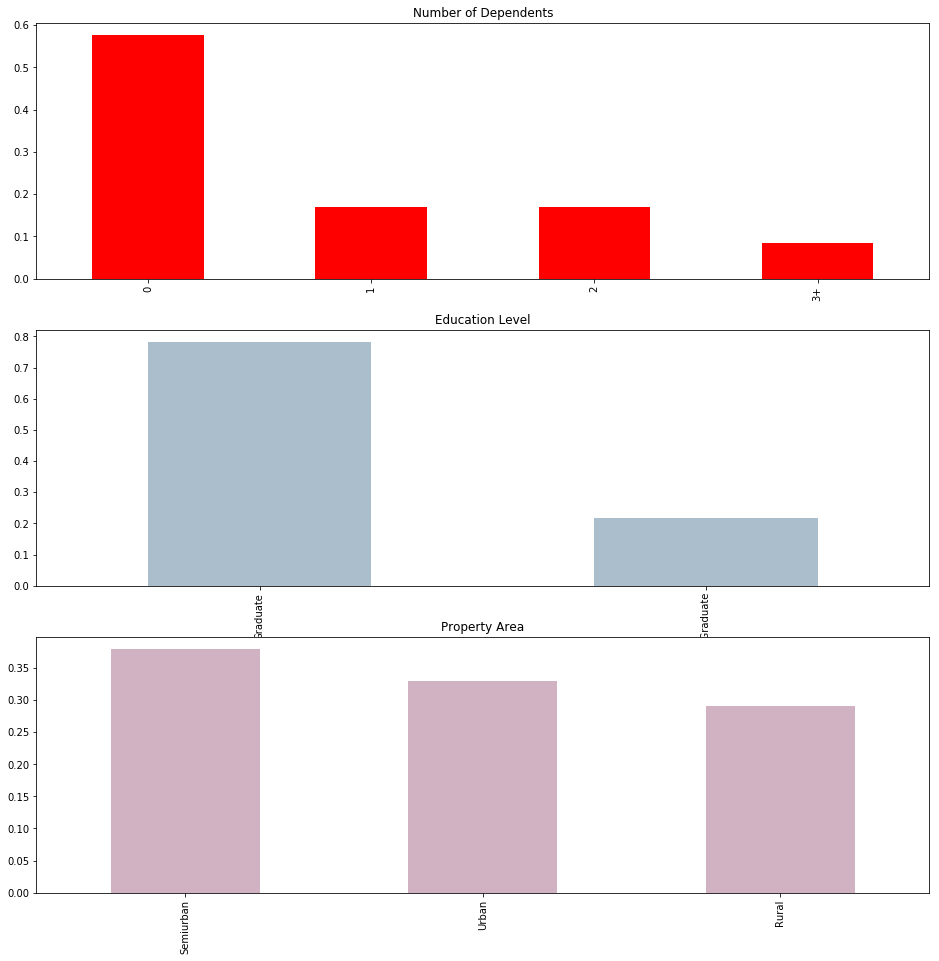

In [11]:
plt.figure(1)

plt.subplot(311)
loan['Dependents'].value_counts(normalize= True).plot.bar(color = 'red', figsize = (16,16), title = 'Number of Dependents');

plt.subplot(312)
loan['Education'].value_counts(normalize= True).plot.bar(color = '#AABFCB', title = 'Education Level');

plt.subplot(313)
loan['Property_Area'].value_counts(normalize= True).plot.bar(color = '#D1B2C3', title = 'Property Area');

## Inferences that can be made from the above graphs:

1. Most Applicants do not have any dependents.
2. Around 78% of people are graduates.
3. Most Properties (around 38%) are in Semi-Urban Areas.

## Independent Variable (Numerical)

Applicant Income

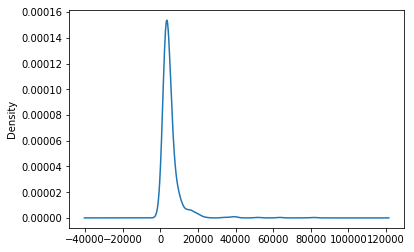

In [12]:
loan['ApplicantIncome'].plot.kde()

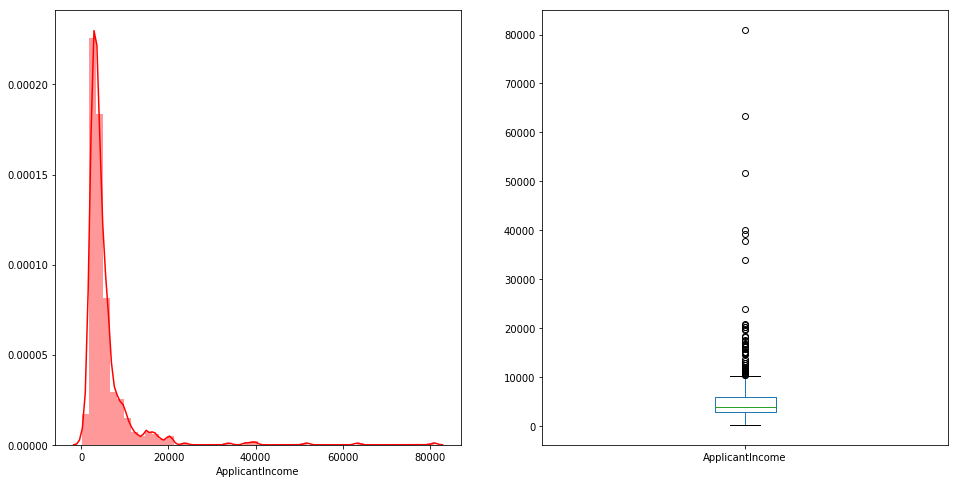

In [13]:
plt.figure(1)

plt.subplot(121)
sb.distplot(a=loan['ApplicantIncome'], norm_hist=True, color = 'red');

plt.subplot(122)
loan['ApplicantIncome'].plot.box(figsize = (16,8))

plt.show(block=False)

You can seee that I have used both Pandas Kernel Density Estimate and Seaborn's Distplot as I wanted to check the difference.

Ifyou read the documentation, then you can see that the Seaborn plot utilises matplotlib histogram and pandas KDE.

### Also the applicant income is not normally distributed (Right Skewed). This needs to be normalized as the modelling works better on normalized data.

The Boxplot also confirms that a lot of outlier values exist. 

Text(0.5,1,'Income and Education')

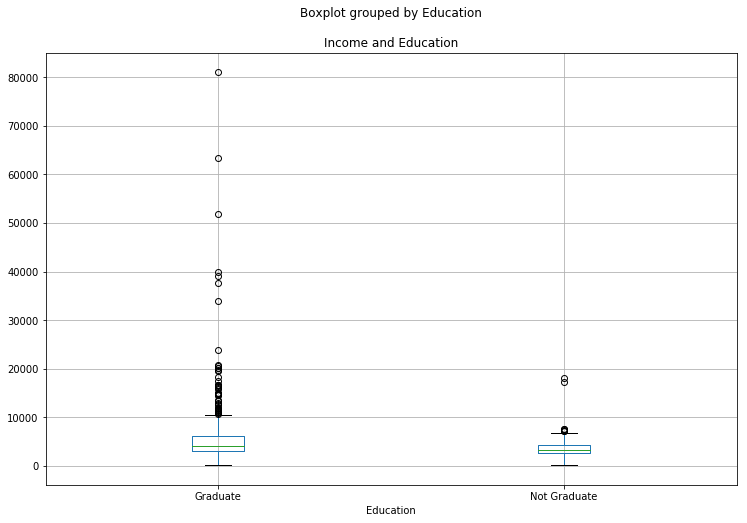

In [14]:
loan.boxplot(column='ApplicantIncome', by='Education', figsize=(12,8));
plt.title('Income and Education')


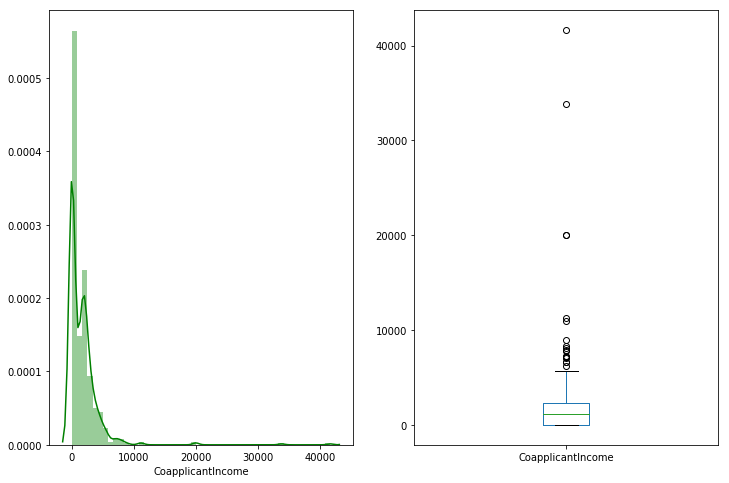

In [15]:
# Let's see the same for Coapplicant income.

# Distribution plot for Coapplicant Income
plt.figure(1)
plt.subplot(121)
sb.distplot(a=loan['CoapplicantIncome'], color = 'green')

plt.subplot(122)
loan['CoapplicantIncome'].plot.box(figsize = (12,8))

plt.show();

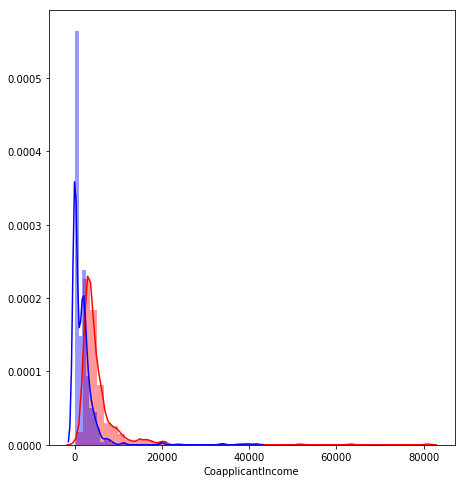

In [16]:
# Getting Distribution Plots for 

plt.figure(1, figsize=(16,8))
plt.subplot(121)
sb.distplot(a=loan['ApplicantIncome'], color = 'red')

plt.subplot(121)
sb.distplot(a=loan['CoapplicantIncome'], color = 'blue')

plt.show();

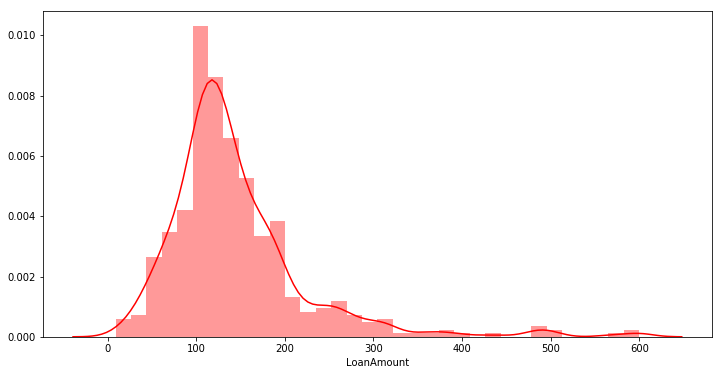

In [17]:
#plt.figure(1, figsize=(16,8))
#sb.distplot(a=loan['LoanAmount'], color = 'red')

# The above lines caused Value Error as there were NaN values in the columns.
df = loan.dropna()
plt.figure(1, figsize=(12,6))
sb.distplot(a=df['LoanAmount'], color = 'red')

# plt.savefig(fname='LoanAmt DistPlot.png')

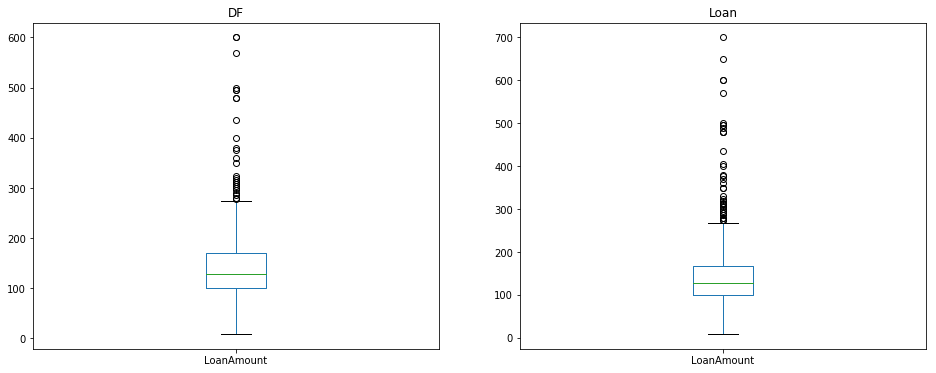

In [18]:
# Getting the Histograms from both the dataframe df and loan for comparison. as df has lot of dropped values.
plt.figure(1, figsize = (16,6))

plt.subplot(121)
df['LoanAmount'].plot.box(title='DF')

plt.subplot(122)
loan['LoanAmount'].plot.box(title='Loan');

## End of Univariate Analysis

## Bivariate Analysis

*Applicants with high income should have more chances of loan approval.

*Applicants who have repaid their previous debts should have higher chances of loan approval.

*Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

*Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Using Bivariate analysis we we will be testing these Hypotheses.


In [19]:
Gender = pd.crosstab(loan['Gender'], loan['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


In [20]:
Gender.div(Gender.sum(1), axis=0)

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


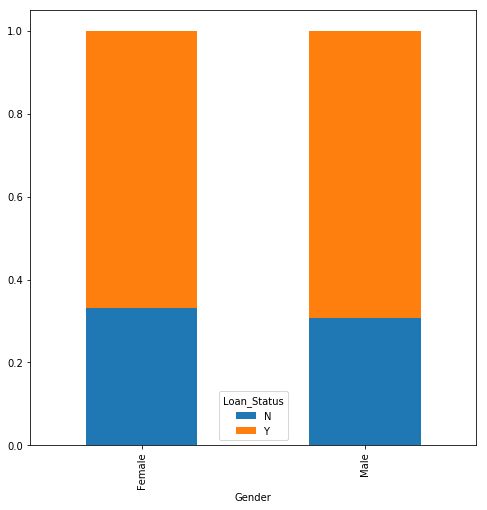

In [21]:
Gender.div(Gender.sum(1), axis=0).plot(kind='bar', stacked='True',figsize=(8,8));

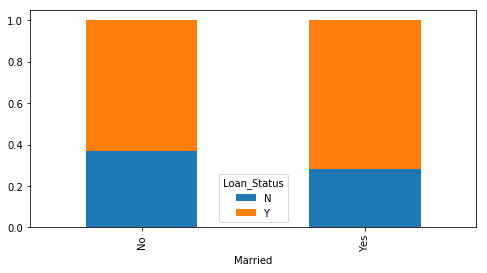

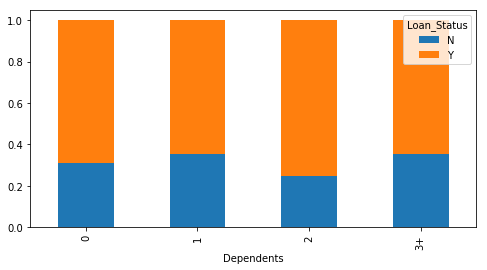

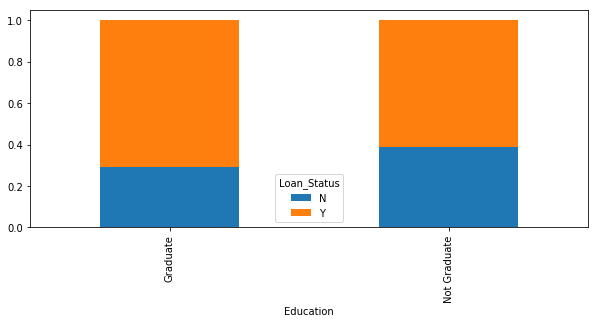

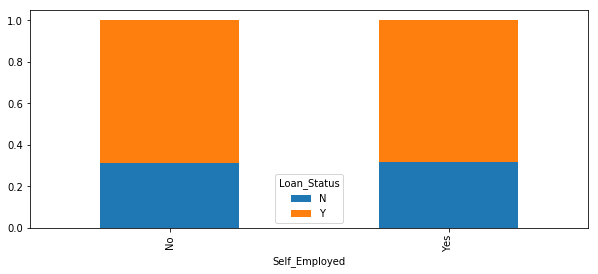

In [22]:
married = pd.crosstab(loan['Married'], loan['Loan_Status'])
dependents = pd.crosstab(loan['Dependents'], loan['Loan_Status'])
education = pd.crosstab(loan['Education'], loan['Loan_Status'])
self_emp = pd.crosstab(loan['Self_Employed'],loan['Loan_Status'])

married.div(married.sum(1), axis=0).plot(kind='bar', stacked='True',figsize=(8,4))

dependents.div(dependents.sum(1), axis=0).plot(kind='bar', stacked='True',figsize=(8,4))

education.div(education.sum(1), axis=0).plot(kind='bar', stacked='True',figsize=(10,4))

self_emp.div(self_emp.sum(1), axis=0).plot(kind='bar', stacked='True',figsize=(10,4));


Now let us look at relationship between different Categorical Independent Variables and Loan_status.

In [23]:
credit = pd.crosstab(loan['Credit_History'], loan['Loan_Status'])
property = pd.crosstab(loan['Property_Area'], loan['Loan_Status'])

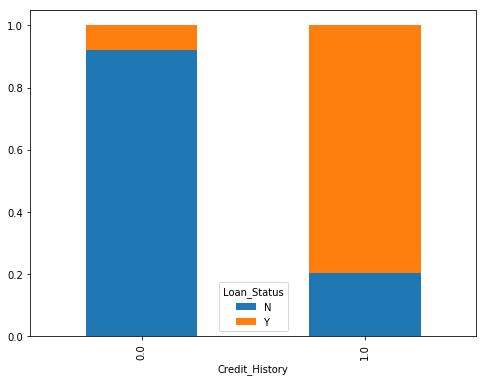

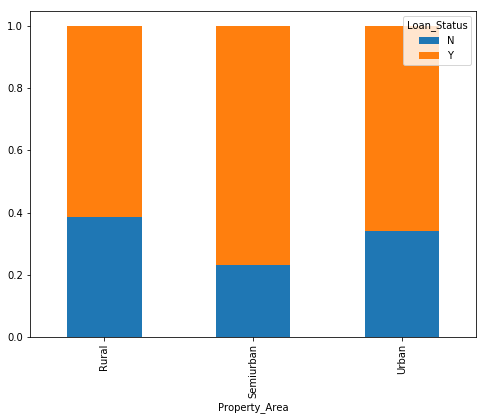

In [24]:
credit.div(credit.sum(1), axis=0).plot(kind='bar', figsize=(8,6), stacked=True)

property.div(property.sum(1), axis=0).plot(kind='bar', figsize=(8,6), stacked = True);

Numerical Independent Variables vs Target Variable.

Let's try and find out the mean income of people for whom loan was approved and the same for those whose loans were not.

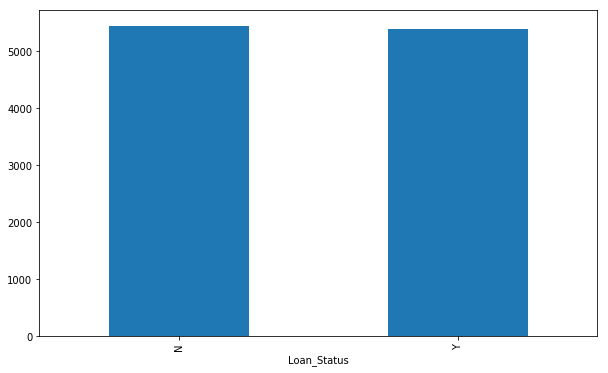

In [25]:
loan.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(stacked=True, figsize=(10,6));


In [26]:
inc_bins = [0, 2500, 4000, 6000, 8000]
group = ['Low','Average','High','Very High']

loan['Income Bin'] = pd.cut(df['ApplicantIncome'], inc_bins, labels=group)

Text(0,0.5,'Percentage')

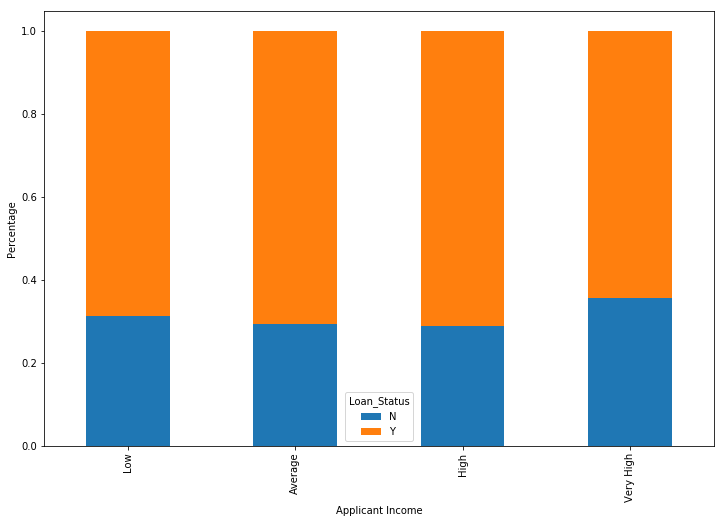

In [27]:
Income_bin = pd.crosstab(loan['Income Bin'], loan['Loan_Status'])
Income_bin.div(Income_bin.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(12,8))
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

Thus we can see that Applicant Income doesn't seem to affect much whether a loan is getting approved or not.

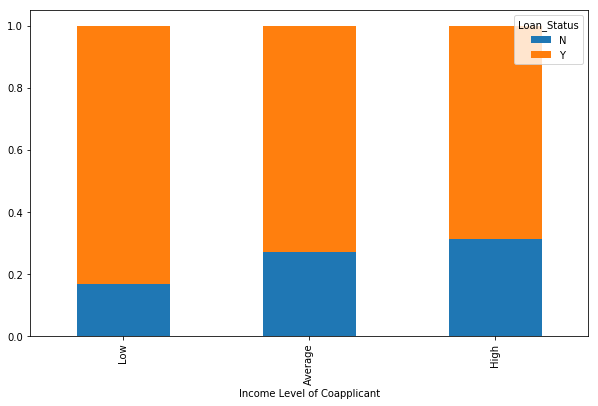

In [28]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']

loan['Coapp_inc_bin'] = pd.cut(df['CoapplicantIncome'], bins, labels = group)

coapp_inc_bin = pd.crosstab(loan['Coapp_inc_bin'], loan['Loan_Status'])
coapp_inc_bin.div(coapp_inc_bin.sum(1), axis=0).plot(kind='bar', stacked='True', figsize=(10,6));
plt.xlabel('Income Level of Coapplicant');

From the above graph we can infer that if the coapplicant income is low, the chances of approval is high.
But how is that possible? This is not a logical inference.

However, earlier it was seen that many applicant's do not have any coapplicant.

To combat this error, we will have a new column that would be sum of applicant + coapplicant income.

??? But this would introduce a new problem. Are there any records with 0 coapplicant but with income.??

In [29]:
# Insert a newe column - Total Income
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']

bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']

loan['Total_Income_Bin'] = pd.cut(loan['Total_Income'], bins, labels=group)
loan.head(10)

In [30]:
Total_income_bin = pd.crosstab(loan['Total_Income_Bin'], loan['Loan_Status'])
Total_income_bin.div(Total_income_bin.sum(1),axis=0).plot(kind='bar', stacked='True', figsize=(10,5))
plt.xlabel('Income Groups');

KeyError: 'Total_Income_Bin'

Thus it is not easy to get loan approved if the total income ability is low.

In [31]:
bins = [0,100,200,700]
group = ['Low', 'Average','High']

loan['LoanAmt_bin'] = pd.cut(loan['LoanAmount'], bins, labels=group)
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income Bin,Coapp_inc_bin,Total_Income,LoanAmt_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,NaN,NaN,5849.0,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Average
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,Average


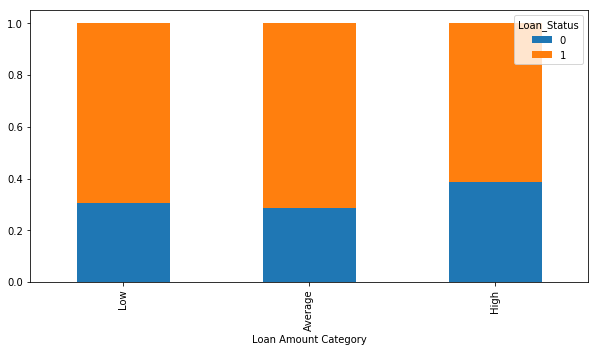

In [33]:
LoanAmt_bin= pd.crosstab(loan['LoanAmt_bin'], loan['Loan_Status'])
LoanAmt_bin.div(LoanAmt_bin.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(10,5));
plt.xlabel('Loan Amount Category');

In [34]:
list(loan.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'Income Bin',
 'Coapp_inc_bin',
 'Total_Income',
 'LoanAmt_bin']

In [44]:
loan = loan.drop(labels=['Income Bin', 'Coapp_inc_bin', 'LoanAmt_bin', 'Total_Income'], axis=1)
loan.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1


In [45]:
loan['Dependents'].replace('3+',3, inplace=True)
loan['Loan_Status'].replace('N',0,inplace=True)
loan['Loan_Status'].replace('Y',1,inplace=True)

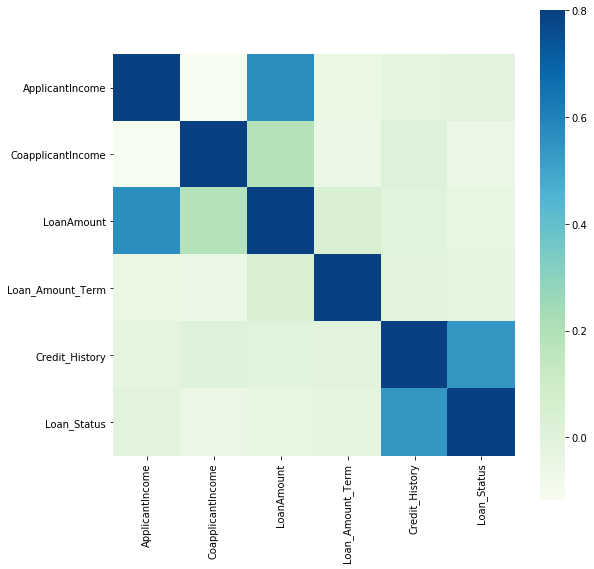

In [50]:
corr_matrix = loan.corr()
fig, ax = plt.subplots(figsize=(9,9)) # -> Without this, the plotsize will be small and hard to read.
sb.heatmap(corr_matrix, vmax=0.8, square=True, cmap='GnBu');

#plt.savefig(fname='Correlation Matrix.jpg') # -> To Save the figure if you want,

Thus we can see that the most important and correlated variables are:
    1. Loan Amount - ApplicantIncome
    2. Loan Amount - Coapplicant Income
    3. Credit History - Loan Status
    

# Missing Value Treatment

In [46]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [47]:
# For Categorical variables use Mode to replace.
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)
loan['Dependents'].fillna(loan['Dependents'].mode()[0], inplace = True)
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace = True)

In [48]:
loan['Loan_Amount_Term'].value_counts()
# 360 -> most frequent term.
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace=True)

In [49]:
# As there were a lot of outliers in the Loan Amount Data, we cant be using Mean. as mean is extremely affected by outliers.
loan['LoanAmount'].fillna(loan['LoanAmount'].median(), inplace = True)

In [41]:
loan.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Income Bin           204
Coapp_inc_bin        350
Total_Income           0
LoanAmt_bin           22
dtype: int64

In [42]:
loan.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Income Bin           204
Coapp_inc_bin        350
Total_Income           0
LoanAmt_bin           22
dtype: int64

## Yay, no more null values left.